In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

from scipy import stats


In [2]:
df = pd.read_csv('volvo_cleaned.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hasar Kaydı             626 non-null    int64  
 1   KM                      626 non-null    float64
 2   Garanti                 626 non-null    object 
 3   Vites                   626 non-null    object 
 4   Çekiş                   626 non-null    object 
 5   Fiyatı                  626 non-null    float64
 6   Motor Tipi              626 non-null    object 
 7   Üretim Yılı             626 non-null    object 
 8   Motor Gücü              626 non-null    object 
 9   Şanzıman                626 non-null    object 
 10  Hızlanma 0-100 km/saat  626 non-null    object 
 11  Azami Sürat             626 non-null    object 
 12  Motor Hacmi             626 non-null    object 
 13  Yakıt Tipi              626 non-null    object 
 14  Ortalama                626 non-null    ob

In [3]:
x = df.drop(['Fiyatı'], axis=1)
y = df['Fiyatı']

enc = OrdinalEncoder()
x = enc.fit_transform(x)
y = y.to_numpy()

In [4]:
kf = KFold(n_splits=10)
results = []
models = [SVR(), LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(), RandomForestRegressor()]

# for model in models:
#     results.append(cross_val_score(model, x, y, cv = 10))


for model in models:
    sum = 0
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(x_train, y_train)
        sum = sum + model.score(x_test, y_test)
    results.append(sum / 10)
print(results)

[0.19343210319936313, 0.8166840989907544, 0.8106388279147291, 0.7797447492961225, 0.8784789154942036]


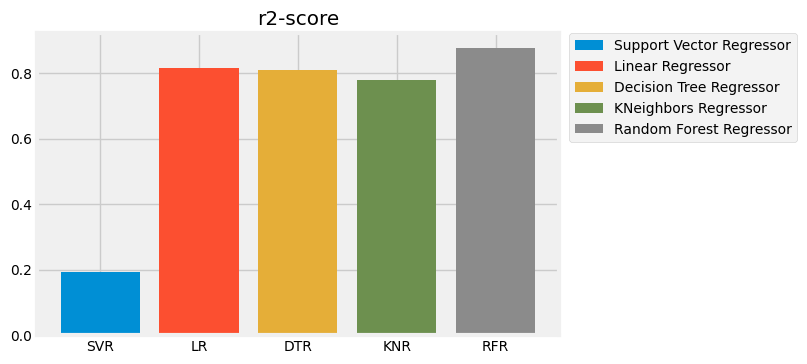

In [5]:
plt.style.use('fivethirtyeight')
plt.figure(dpi=100)

plt.bar('SVR', results[0], label='Support Vector Regressor')
plt.bar('LR', results[1], label='Linear Regressor')
plt.bar('DTR', results[2], label='Decision Tree Regressor')
plt.bar('KNR', results[3], label='KNeighbors Regressor')
plt.bar('RFR', results[4], label='Random Forest Regressor')

plt.title('r2-score')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('r2scores.png', bbox_inches='tight')

plt.show()

In [6]:
LR = model[1].predict(x_test)
DT = model[2].predict(x_test)

In [7]:
KNREG = model[3].predict(x_test)
RFREG = model[4].predict(x_test)

(array([ 2.,  7., 20., 17.,  7.,  4.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 169.  ,  246.05,  323.1 ,  400.15,  477.2 ,  554.25,  631.3 ,
         708.35,  785.4 ,  862.45,  939.5 , 1016.55, 1093.6 , 1170.65,
        1247.7 , 1324.75, 1401.8 , 1478.85, 1555.9 , 1632.95, 1710.  ]),
 <BarContainer object of 20 artists>)

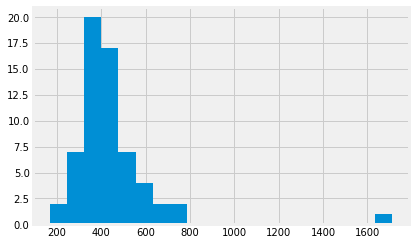

In [8]:
plt.hist(LR,bins=20)

(array([ 3.,  7., 18., 20.,  5.,  2.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 155. ,  238.5,  322. ,  405.5,  489. ,  572.5,  656. ,  739.5,
         823. ,  906.5,  990. , 1073.5, 1157. , 1240.5, 1324. , 1407.5,
        1491. , 1574.5, 1658. , 1741.5, 1825. ]),
 <BarContainer object of 20 artists>)

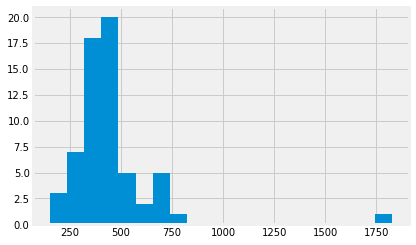

In [9]:
plt.hist(DT,bins=20)

(array([ 3.,  7., 16., 15., 11.,  7.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 177.5  ,  248.125,  318.75 ,  389.375,  460.   ,  530.625,
         601.25 ,  671.875,  742.5  ,  813.125,  883.75 ,  954.375,
        1025.   , 1095.625, 1166.25 , 1236.875, 1307.5  , 1378.125,
        1448.75 , 1519.375, 1590.   ]),
 <BarContainer object of 20 artists>)

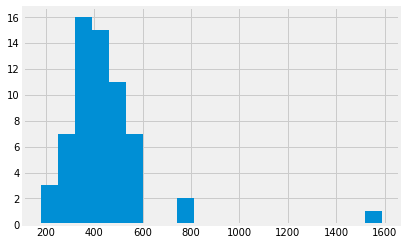

In [10]:
plt.hist(RFREG,bins=20)


(array([ 1., 15., 21., 15.,  3.,  2.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 169. ,  251.8,  334.6,  417.4,  500.2,  583. ,  665.8,  748.6,
         831.4,  914.2,  997. , 1079.8, 1162.6, 1245.4, 1328.2, 1411. ,
        1493.8, 1576.6, 1659.4, 1742.2, 1825. ]),
 <BarContainer object of 20 artists>)

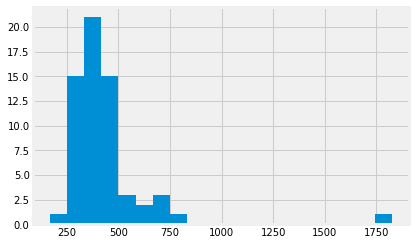

In [11]:
plt.hist(KNREG,bins=20)

In [12]:
print(stats.ttest_ind(KNREG, DT))
print(stats.ttest_ind(RFREG, DT))
print(stats.ttest_ind(LR, LR))
print(stats.ttest_ind(KNREG, RFREG))
print(stats.ttest_ind(LR, KNREG))

Ttest_indResult(statistic=-0.5078443902432215, pvalue=0.612479407651765)
Ttest_indResult(statistic=-0.33716183621959206, pvalue=0.7365742566229299)
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=-0.20200340786397447, pvalue=0.8402505133200399)
Ttest_indResult(statistic=0.36021448257495337, pvalue=0.7193096068215683)


In [13]:
len(LR)

62

In [14]:
LR = model[1].predict(x)
DT = model[2].predict(x)

print(stats.ttest_ind(LR, DT))

Ttest_indResult(statistic=-0.4658295246649571, pvalue=0.6414186846113155)


In [15]:
for id in range(len(LR)):
    print(LR[id],y[id])
    # print(id)

515.0 515.0
530.0 530.0
405.0 442.5
609.0 609.0
514.0 514.0
485.0 485.0
369.0 369.0
367.0 400.0
205.0 205.0
309.75 309.75
260.0 260.0
400.0 400.0
305.0 305.0
341.0 318.5
255.0 275.0
590.0 675.0
685.0 685.0
655.0 655.0
618.5 535.0
525.0 405.0
410.0 425.0
689.0 689.0
550.0 550.0
337.5 337.5
169.0 169.0
537.5 537.5
467.0 467.0
275.0 275.0
395.0 395.0
420.0 420.0
526.5 525.0
405.0 370.0
296.0 296.0
490.0 490.0
351.0 351.0
490.0 490.0
340.0 340.0
302.5 302.5
410.0 410.0
360.0 305.0
729.0 729.0
455.0 570.0
205.0 280.0
206.0 206.0
419.9 419.9
460.0 460.0
1600.0 1600.0
709.0 775.0
550.0 525.0
370.0 282.5
459.5 459.5
415.0 415.0
405.0 375.0
275.0 275.0
427.9 465.0
299.5 299.5
530.0 409.0
430.0 435.0
618.5 618.5
514.35 514.35
451.6666666666667 440.0
365.0 305.0
514.0 530.0
402.0 398.75
465.0 565.0
625.0 650.0
160.0 160.0
405.0 348.0
650.0 650.0
367.0 367.0
355.0 355.0
567.5 567.5
685.0 670.0
425.0 378.0
365.0 365.0
400.0 290.0
435.75 435.75
500.0 577.9
425.0 425.0
375.0 415.5
585.0 669.0
425.0 3

In [16]:
len(y_train),len(y_test)

(564, 62)

In [17]:
import seaborn as sns
df.head()


,Hasar Kaydı,KM,Garanti,Vites,Çekiş,Fiyatı,Motor Tipi,Üretim Yılı,Motor Gücü,Şanzıman,Hızlanma 0-100 km/saat,Azami Sürat,Motor Hacmi,Yakıt Tipi,Ortalama,Durumu,Kimden
0,0,110.0,Evet,Yarı Otomatik,Önden Çekiş,515.0,Dizel / 4 silindir,2014 / 2016,115 hp,Powershift / 6 Vites / Önden Çekiş,"12,3 sn",190 km/saat,1560 cc,Dizel / EURO 5,"4,1 lt",İkinci El,Galeriden
1,0,179.0,Hayır,Yarı Otomatik,Önden Çekiş,530.0,Dizel / 4 silindir,2014 / 2016,115 hp,Powershift / 6 Vites / Önden Çekiş,"12,3 sn",190 km/saat,1560 cc,Dizel / EURO 5,"4,1 lt",İkinci El,Sahibinden
2,1,190.0,Hayır,Yarı Otomatik,Önden Çekiş,442.5,Dizel / 4 silindir,2014 / 2016,115 hp,Powershift / 6 Vites / Önden Çekiş,"12,3 sn",190 km/saat,1560 cc,Dizel / EURO 5,"4,1 lt",İkinci El,Sahibinden
3,0,92.0,Hayır,Yarı Otomatik,Önden Çekiş,609.0,Benzinli / 4 silindir,2015 / 2016,152 hp,Geartronic / 6 Vites / Önden Çekiş,"8,6 sn",210 km/saat,1498 cc,Benzinli / EURO 6,"5,8 lt",İkinci El,Galeriden
4,0,128.0,Hayır,Yarı Otomatik,Önden Çekiş,514.0,Dizel / 4 silindir,2014 / 2016,115 hp,Powershift / 6 Vites / Önden Çekiş,"12,3 sn",190 km/saat,1560 cc,Dizel / EURO 5,"4,1 lt",İkinci El,Sahibinden


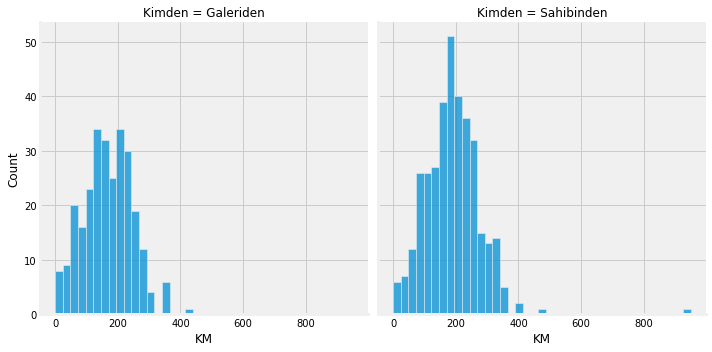

In [18]:
sns.displot(df, x="KM", col="Kimden")

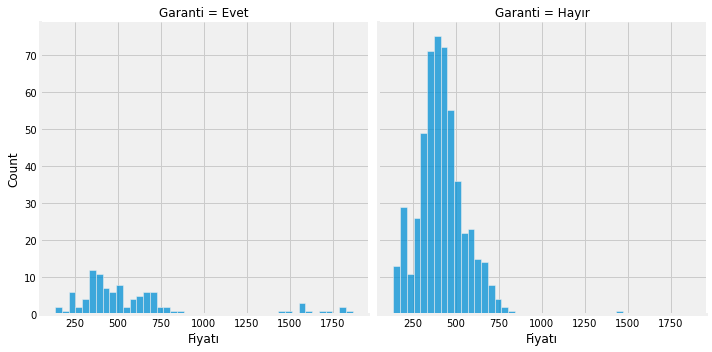

In [19]:
sns.displot(df, x="Fiyatı", col="Garanti")
plt.savefig('hist_garanti.png')
plt.savefig('hist.png')